# Data Scientist and Machine Learning Final Project
We are provided with data from OK cupid via a CSV file from Codecademy.

In this project, I will analyse what is provided in the data and ask a series of questions in which a machine learning algorithm 
would be suitable to make a prediction.

There will be three types of algorithms used for the predictions:
* Supervised
* Unsupervised
* Natural language

A question will be formulated to see if the chosen algorithms can predict the answer to the question accurately.

## Exploring the Data

In [1]:
# Using this as a basis: https://github.com/AliPakzad/Machine-Learning-Capstone-Project/blob/main/date-a-scientist.ipynb
# as well as notes from: https://github.com/rafabrisighello/Data_Science_Final_Project_CodeCademy/blob/19e45e1ff7235df06142cd25ee1d4a033d027c43/date-a-scientist.ipynb

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###########################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

In [2]:
#############################################

#Create your df here:
df = pd.read_csv("profiles.csv")

In [3]:
print(df.head(5))
print(df.pets.head())

#print(df.shape())   # doesn't work here!

   age       body_type               diet    drinks      drugs   
0   22  a little extra  strictly anything  socially      never  \
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education   
0      working on college/university  \
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0   
0  about me:<br />\n<br />\ni would love to think...  \
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The average age is 32 years old, with a standard deviation of 9 years. The data ranges from 18 to 100. It's interesting that someone that old would be on that platform so that age could be taken with a grain of salt, so we could remove the outlier here.

The average height is 68.3 inches, with a 4" standard deviation. The height range is between  1 and 95, so there is quite a bit of bad data in there for a datapoint of 1" high. This most certainly needs to be cleaned to remove outliers.


In [4]:
df = df[(df['income'] <= 200000)]
df = df[(df['age'] <= 75)]
df = df[(df['height'] > 50) & (df['height'] < 85)]
print(df.describe())

                age        height         income
count  59173.000000  59173.000000   59173.000000
mean      32.356632     68.279012   10443.134572
std        9.452186      3.856685   27041.360617
min       18.000000     51.000000      -1.000000
25%       26.000000     66.000000      -1.000000
50%       30.000000     68.000000      -1.000000
75%       37.000000     71.000000      -1.000000
max       69.000000     84.000000  150000.000000


This gives a much better view of those columns with the outliers removed!
Lets see where the null values are in the dataset:

In [5]:
print(df.isnull().sum())

age                0
body_type       5246
diet           24153
drinks          2936
drugs          13903
education       6564
essay0          5425
essay1          7486
essay2          9536
essay3         11339
essay4         10399
essay5         10700
essay6         13619
essay7         12313
essay8         19042
essay9         12486
ethnicity       5583
height             0
income             0
job             8126
last_online        0
location           0
offspring      35119
orientation        0
pets           19716
religion       20027
sex                0
sign           10899
smokes          5432
speaks            50
status             0
dtype: int64


Checking out the null values in the dataset to get a feel as to why it could be missing:

In [6]:
print(df[df.height.isnull()])

Empty DataFrame
Columns: [age, body_type, diet, drinks, drugs, education, essay0, essay1, essay2, essay3, essay4, essay5, essay6, essay7, essay8, essay9, ethnicity, height, income, job, last_online, location, offspring, orientation, pets, religion, sex, sign, smokes, speaks, status]
Index: []

[0 rows x 31 columns]


We can infer the data with no missing, or few values are the important values to people in finding a match:
* age
* income
* location
* orientation
* sex
* status
* height

The other inference here is that some of this data is mandatory in setting up a profile.

The ones that are missing could be that they don't want to share, or missed the question. We should keep this in mind when exploring the dataset, so lets replace them as we go with "not submitted" or similar so it shows up in the visualisations. We can only do this for categoricals however, since it will skew the data for continuous values.


## Male/Female Proportions Spread
Let's take a look at the proportion of Men vs Women on the site:

In [7]:
mf_counts = df.sex.value_counts()
print(mf_counts)

sex
m    35207
f    23966
Name: count, dtype: int64


There are more men than women, so the data exploration is normalised for visualisation when investigating comparisons between men and women.

In [8]:
# for info, the ratio between men and women is:
ratio = mf_counts[1] / mf_counts[0]
print(ratio)

0.6807169028886301


When plotting the histogram of counts, we'll normalise the counts so that the heights add up to 1.0 using `stat='probability'` or `stat='density'` (these are interchangeable in tis context).
We also need to use common_norm=False in order to independently normalise the two sexes.

Note: we cannot use `displot()` for subplots as it doesn't support it. We have to use `histplot` instead!

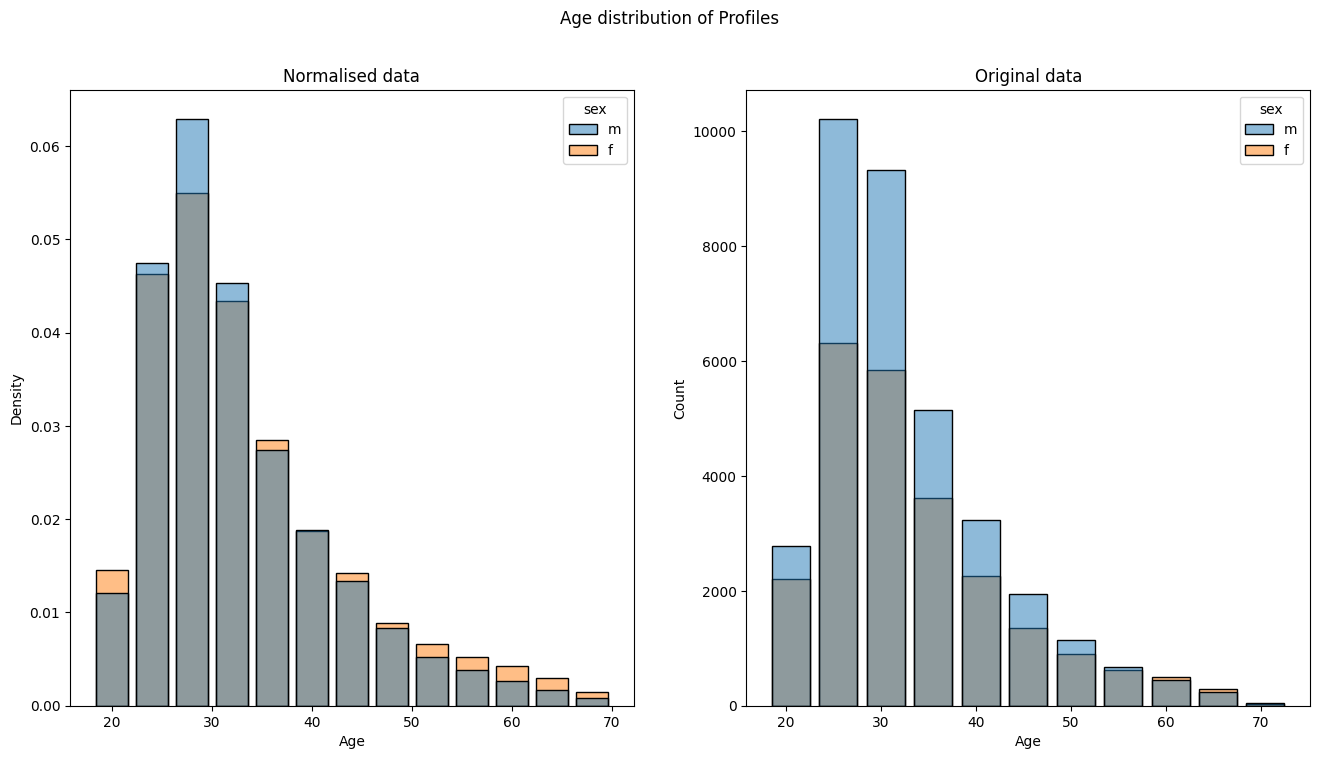

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Age distribution of Profiles')

sns.histplot(ax=axes[0], data=df, x="age", hue="sex", binwidth=4, shrink=0.8, stat="density", common_norm=False)
axes[0].set_title("Normalised data")
axes[0].set_xlabel("Age")
#axes[0].set_xlim([15, 80])

sns.histplot(ax=axes[1], data=df, x="age", hue="sex", binwidth=5, shrink=0.8) #,multiple='dodge')
axes[1].set_title("Original data")
axes[1].set_xlabel("Age")
#axes[1].set_xlim([15, 80])
plt.show()



As we can see, the normalised data now shows that there are more men in the average age bracket than women on their profiles. Proportionally, there are more women that are either younger or older than the average age on the OK cupid platform.

Text(0.5, 0, 'Height')

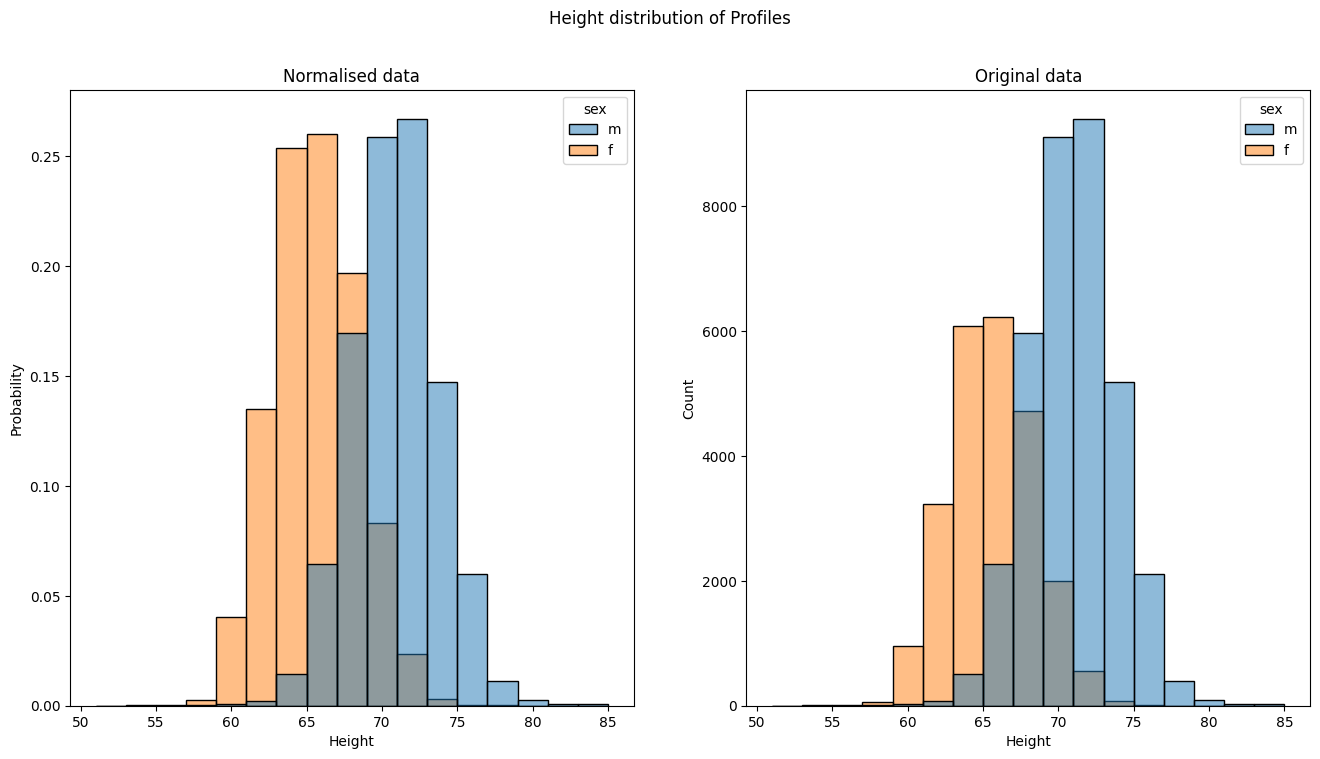

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Height distribution of Profiles')
axes[0].set_title("Normalised data")
axes[1].set_title("Original data")
sns.histplot(ax=axes[0], data=df, x="height", hue="sex", binwidth=2, stat="probability", common_norm=False)
axes[0].set_xlabel("Height")
#axes[0].set_xlim([50, 85])
sns.histplot(ax=axes[1], data=df, x="height", hue="sex", binwidth=2,)
axes[1].set_xlabel("Height")
#axes[1].set_xlim([50, 85])
#sns.displot(data=df, x="height", hue="sex", binwidth=2, multiple="stack", stat="probability", common_norm=False)
#plt.xlim(50,85)

The average height of Men is higher than that of Women.
## Income

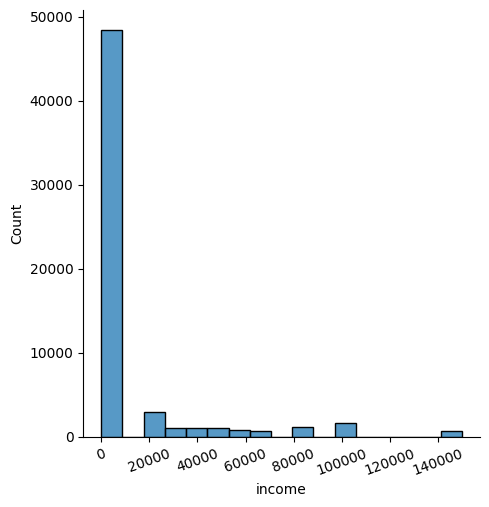

In [11]:
sns.displot(data=df, x="income")
#plt.xlim(0,1e5)
#plt.xscale('log')
plt.xticks(rotation=20)
plt.show()

The vast majority of income is below 200k. 

Let's break this down for Men vs Women and see what the gap is.

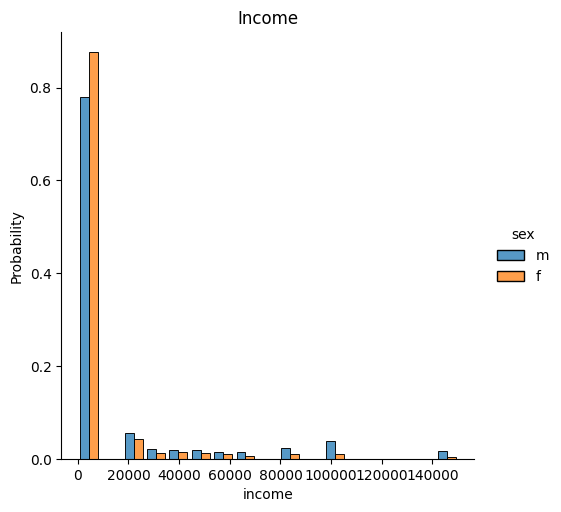

In [12]:
sns.displot(data=df, x="income", hue="sex", multiple='dodge', shrink=0.8, stat="probability", common_norm=False)
# setting bin width to a finer grained approach increases the calc time by a large factor!
#sns.displot(data=df, x="income", hue="sex", binwidth=2, multiple="stack", stat="probability", common_norm=False)
plt.title("Income")
plt.show()

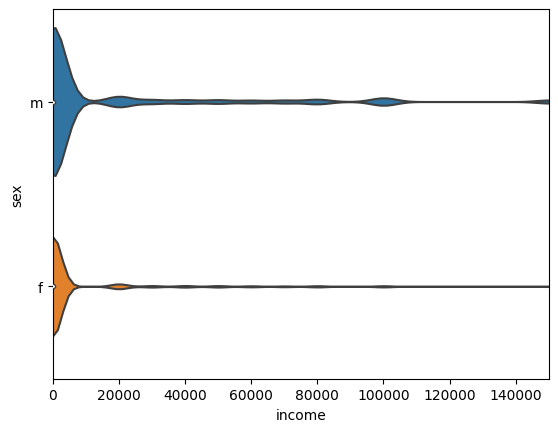

In [13]:
sns.violinplot(df, x='income', y='sex', scale='count')
#sns.violinplot(df, x='income', y='sex', scale='count')
plt.xlim([0,0.15e6])
plt.show()

In the lower income area, there are more Women earning less than men. Men listed having higher income, including those stating they earn 1M+.

## Body Type

In [14]:
# Clean the data first:
df['body_type_cleaned'] = df['body_type'].fillna("No Answer")

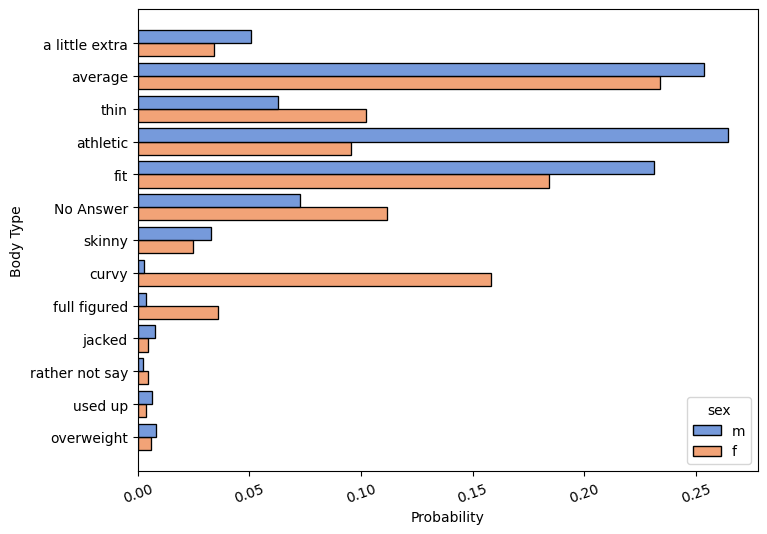

In [15]:
plt.figure(figsize=(8,6))
#sns.countplot(data=df, x="body_type", hue="sex")
#sns.displot(data=df, y="body_type", hue="sex", stat="probability", common_norm=False)
sns.histplot(data=df, y="body_type_cleaned", hue="sex", stat="probability", multiple='dodge', shrink=0.8, common_norm=False, palette='muted')
plt.xticks(rotation=20)
plt.ylabel("Body Type")
plt.show()


The language used to describe their body type differs markedly;
If not describing themselves as "average", Men tend to describe themselves as "athletic" whilst the Women favour terms like "thin", "curvy" or "full figured".
For the value of "No Answer", more Women declined to fill this in.

## Lifestyle
Next, we'll go through diet, smoking, drinking and drug use.

In [16]:
# Clean the data
df[['diet_cleaned', 'drinks_cleaned', 'smokes_cleaned', 'drugs_cleaned']] = df[['diet', 'drinks', 'smokes', 'drugs']].fillna("No Answer")

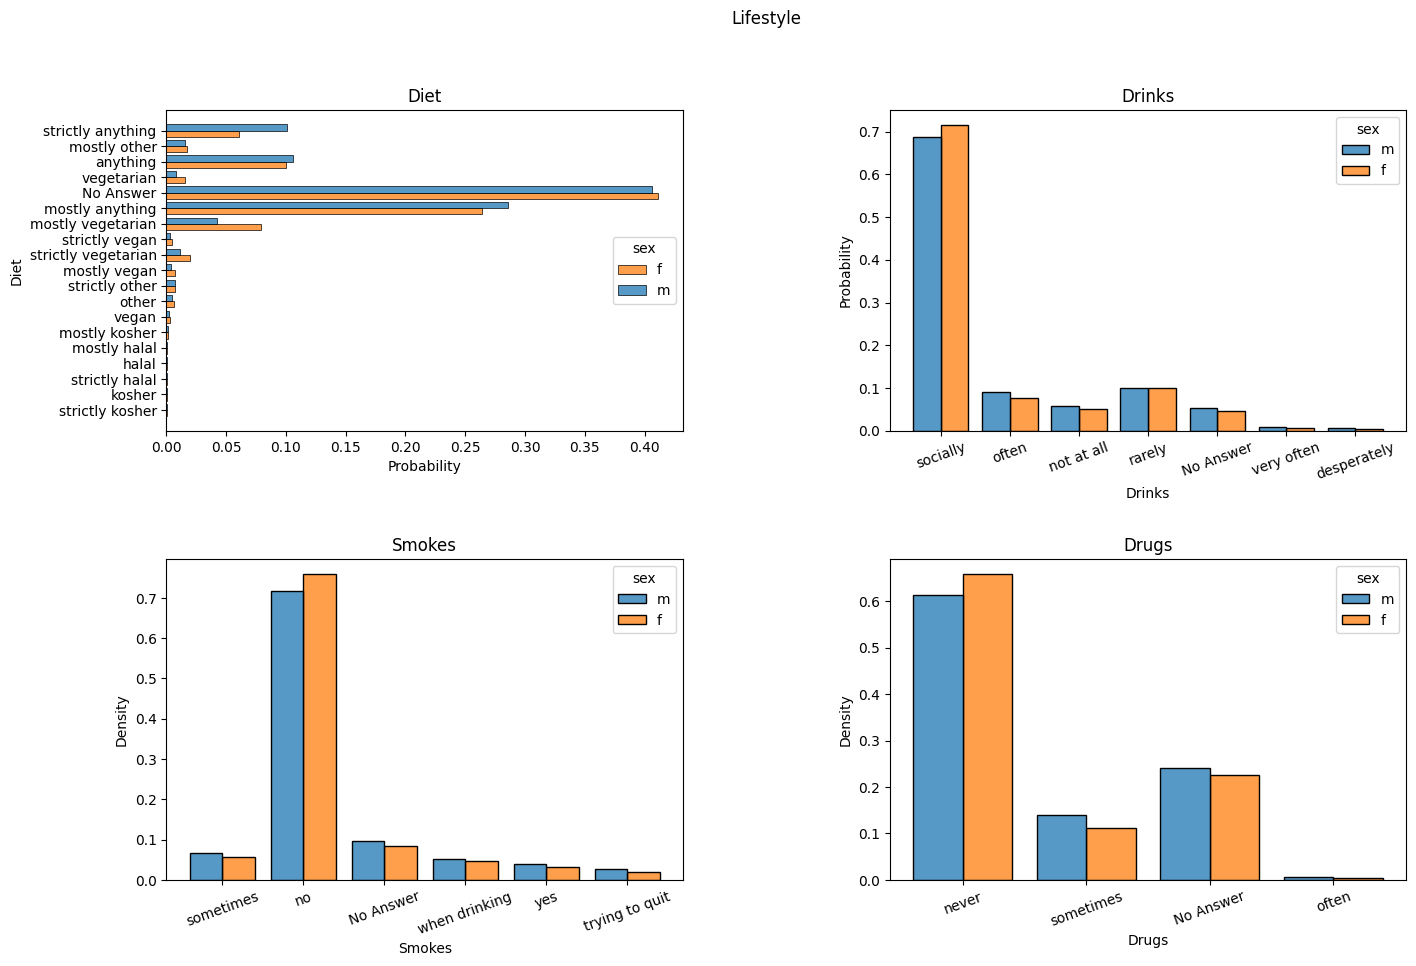

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle('Lifestyle')
sns.histplot(ax=axes[0][0], data=df, y="diet_cleaned", hue="sex", multiple='dodge', shrink=0.8, stat="probability", common_norm=False)
axes[0][0].set_title("Diet")
axes[0][0].set_ylabel("Diet")
axes[0][0].legend(['f', 'm'], title="sex", loc='right')
#axes[0][0].set_xlabel("Density")

sns.histplot(ax=axes[0][1], data=df, x="drinks_cleaned", hue="sex", multiple='dodge', shrink=0.8, stat="probability", common_norm=False)
axes[0][1].set_title("Drinks")
axes[0][1].set_xlabel("Drinks")
axes[0][1].tick_params(axis='x', rotation=20)


sns.histplot(ax=axes[1][0], data=df, x="smokes_cleaned", hue="sex", multiple='dodge', shrink=0.8, stat="density", common_norm=False)
axes[1][0].set_title("Smokes")
axes[1][0].set_xlabel("Smokes")
axes[1][0].tick_params(axis='x', rotation=20)

sns.histplot(ax=axes[1][1], data=df, x="drugs_cleaned", hue="sex", multiple='dodge', shrink=0.8, stat="density", common_norm=False)
axes[1][1].set_title("Drugs")
axes[1][1].set_xlabel("Drugs")
axes[1][1].tick_params(axis='x', rotation=20)

# Add a bit of spacing between subplots
plt.subplots_adjust(wspace=0.4,hspace=0.4)

* **Diet:** The largest category is those that chose not to answer. Other than that, the results are mostly the same here, apart from more Women stating they're vegetatian than Men.
* **Drinks:** The largest answer by far for both sexes is socially. 
* **Smokes:** No is the largest category, distantly followed by "No Answer" , "sometimes" and "when drinking".
* **Drugs:** The results are fairly evenly split. No answer is a large category by itself, perhaps due to the stigma attached.

## Education
Time to explore the education levels and careers of the dating profiles.

In [18]:
# Clean the data first:
df['education_cleaned'] = df['education'].fillna("No Answer")

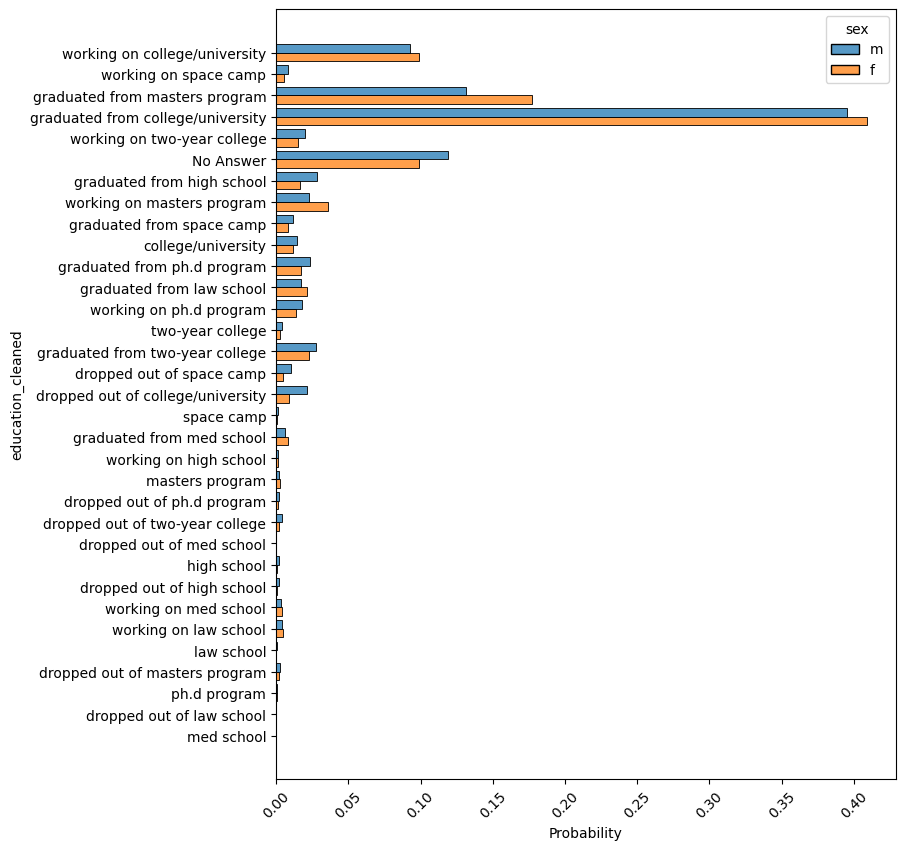

In [19]:
plt.figure(figsize=(8,10))
sns.histplot(data=df, y="education_cleaned", hue="sex", stat="probability", multiple='dodge', shrink=0.8, common_norm=False)
plt.xticks(rotation=45) 
plt.show()

This data is quite messy so lets clean it up a bit by aggregating the "working on" into the next highest level of education achieved. For example studying at university means that they passed high school.
Other sections that can be aggregated are "graduated from", with their corresponding keywords like college. For example there are two sections "graduated from college" and "college", which we assume are the same items.

We have to be careful in classing dropouts, as dropping out of a PHD isn't equivalent to dropping out of 2 year college as they have different entry requirements. 
A similar situation for studying. We can't lump the high schoolers in with the masters degree people as they're not equivalent area of study.

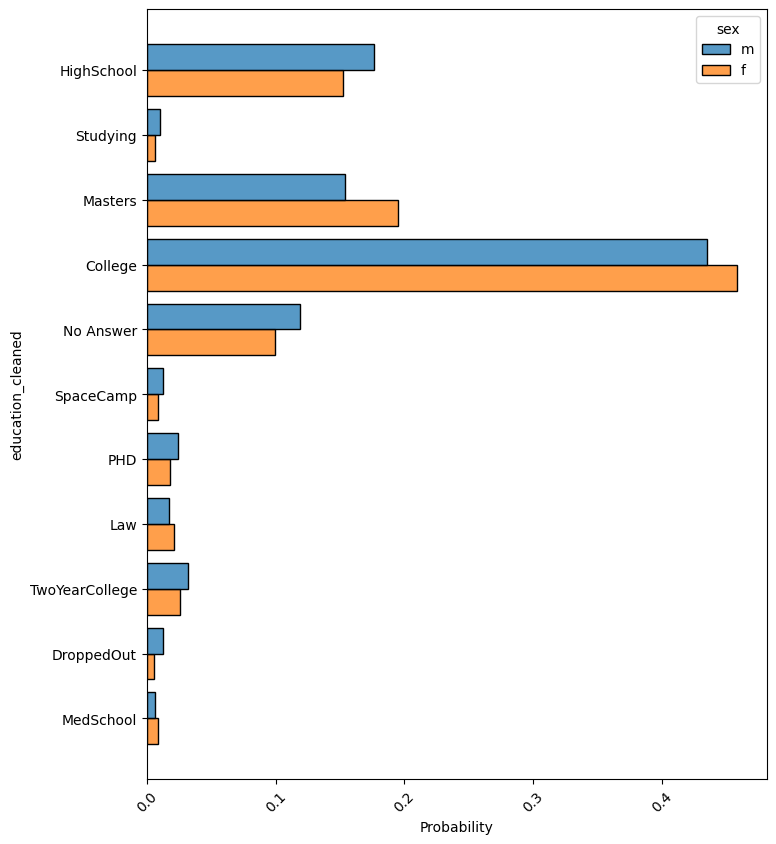

In [20]:
df.loc[df['education_cleaned'].str.contains('working on college'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('working on two-year'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('working on med'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('working on law'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('working on masters'), 'education_cleaned'] = 'College'
df.loc[df['education_cleaned'].str.contains('working on ph.d'), 'education_cleaned'] = 'Masters'
df.loc[df['education_cleaned'].str.contains('working on'), 'education_cleaned'] = 'Studying'

# take care of dropout heirarchy
df.loc[df['education_cleaned'].str.contains('dropped out of college'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('dropped out of ph.d'), 'education_cleaned'] = 'Masters' #this is the general path
df.loc[df['education_cleaned'].str.contains('dropped out of two-year'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('dropped out of med school'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('dropped out of masters'), 'education_cleaned'] = 'College'
df.loc[df['education_cleaned'].str.contains('dropped out of law'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('dropped out'), 'education_cleaned'] = 'DroppedOut'

# clean the remainders
df.loc[df['education_cleaned'].str.contains('space camp'), 'education_cleaned'] = 'SpaceCamp'
df.loc[df['education_cleaned'].str.contains('high school'), 'education_cleaned'] = 'HighSchool'
df.loc[df['education_cleaned'].str.contains('masters program'), 'education_cleaned'] = 'Masters'
df.loc[df['education_cleaned'].str.contains('college/university'), 'education_cleaned'] = 'College'
df.loc[df['education_cleaned'].str.contains('law school'), 'education_cleaned'] = 'Law'
df.loc[df['education_cleaned'].str.contains('ph.d'), 'education_cleaned'] = 'PHD'
df.loc[df['education_cleaned'].str.contains('med school'), 'education_cleaned'] = 'MedSchool'
df.loc[df['education_cleaned'].str.contains('two-year'), 'education_cleaned'] = 'TwoYearCollege'

plt.figure(figsize=(8,10))
sns.histplot(data=df, y="education_cleaned", hue="sex", stat="probability", multiple='dodge', shrink=0.8, common_norm=False)
plt.xticks(rotation=45) 
plt.show()

This is a much clearer visual now!
The majority have completed college, or higher.
More Women have graduated from a Masters degree, whereas men tended to have high school or "no answer" listed.


"No Answer" is quite a large group by itself.

## Career

In [21]:
# Clean the data first:
df['job_cleaned'] = df['job'].fillna("No Answer")

In [22]:
print(df.job_cleaned.value_counts())

job_cleaned
No Answer                            8126
other                                7511
student                              4820
science / tech / engineering         4806
computer / hardware / software       4659
sales / marketing / biz dev          4352
artistic / musical / writer          4337
medicine / health                    3641
education / academia                 3480
executive / management               2309
banking / financial / real estate    2233
entertainment / media                2222
law / legal services                 1360
hospitality / travel                 1340
construction / craftsmanship         1006
clerical / administrative             802
political / government                697
rather not say                        420
transportation                        361
unemployed                            264
retired                               229
military                              198
Name: count, dtype: int64


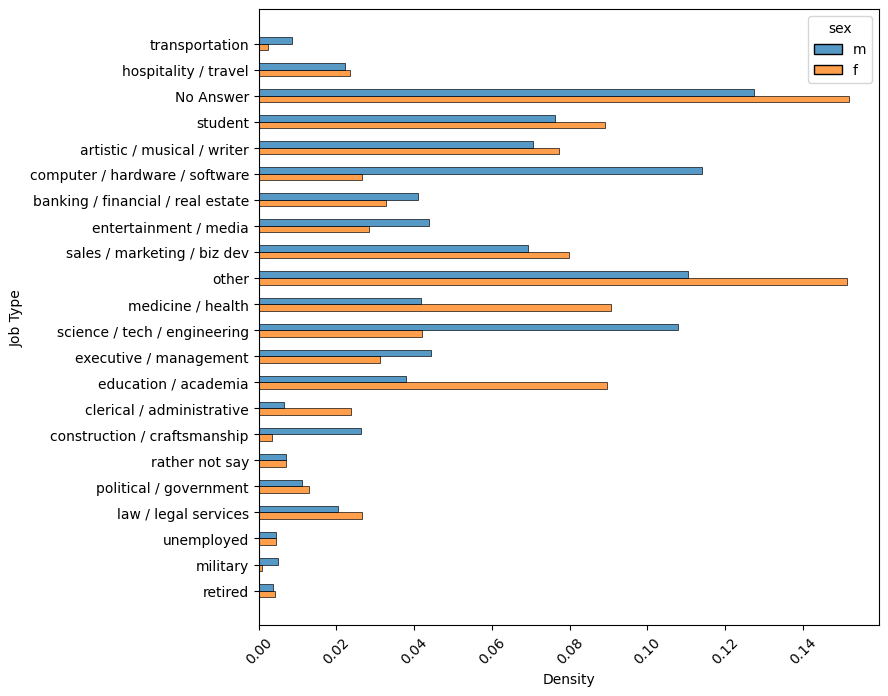

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, y="job_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.5, common_norm=False)
plt.ylabel("Job Type")
plt.xticks(rotation=45)
plt.show()

There's quite a few categories here, so lets clean them up a bit to reduce the noise.

In [24]:
job_grouping = {'other': 'Other', 'student': 'Student', 'science / tech / engineering': 'STEM', 
    'computer / hardware / software': 'STEM', 'artistic / musical / writer': 'Arts', 
    'sales / marketing / biz dev': 'Communications', 'medicine / health': 'Health', 
    'education / academia': 'Education', 'executive / management': 'Business', 
    'banking / financial / real estate': 'Business', 'entertainment / media': 'Arts',  
    'law / legal services': 'Legal', 'hospitality / travel': 'Hospitality',  
    'construction / craftsmanship': 'Construction', 'clerical / administrative': 'Admin', 
    'political / government': 'Government', 'rather not say': 'Other', 'transportation': 'Government', 
    'unemployed': 'Other', 'retired': 'Other', 'military': 'Government', 'No Answer': 'No Answer'}
df['job_cleaned'] = df['job_cleaned'].map(job_grouping)

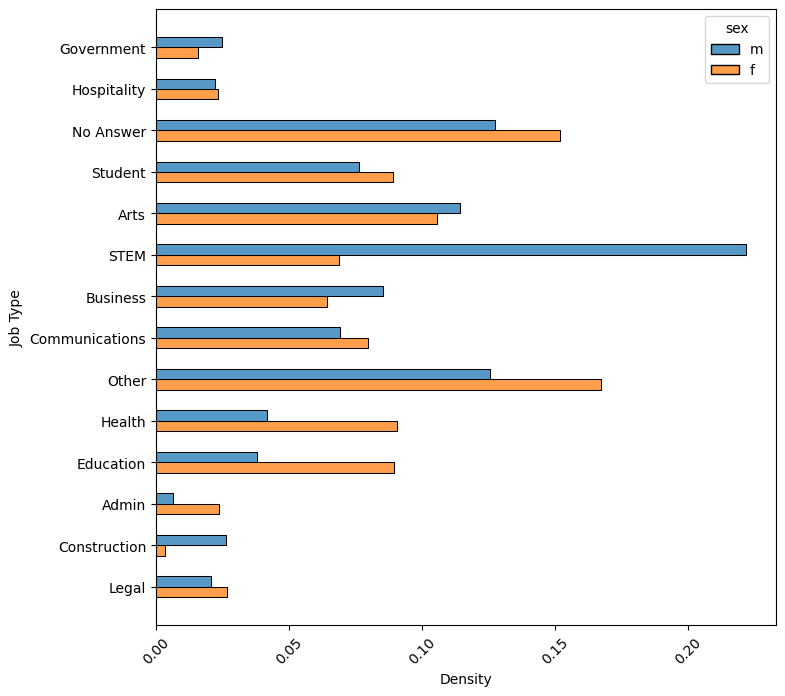

In [25]:
# Take a look at the condensed data
plt.figure(figsize=(8,8))
sns.histplot(data=df, y="job_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.5, common_norm=False)
plt.ylabel("Job Type")
plt.xticks(rotation=45)
plt.show()

A large proportion of people had "No Answer", which is about as large as the "Other" category.
The most counted categories are:
* STEM
* Arts
* Student
* Business
* Communications
* There is also "other" which isn't a good data point.

Women tend to be employed in Health and Education and Admin.
Men are more likely to be in Government, STEM, and construction.

# Children

In [26]:
# Clean the data first:
df['offspring_cleaned'] = df['offspring'].fillna("No Answer")

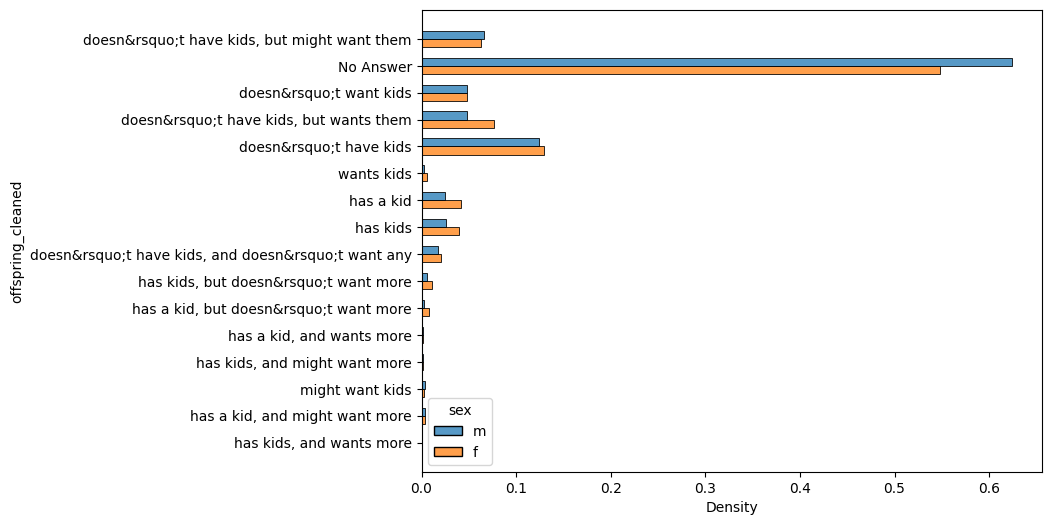

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, y="offspring_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False)
plt.show()

The data labels needs to be cleaned somewhat, as apostrophes aren't handled well.
The majority didn't answer.
The largest category with an answered question is 'doesn't have kids'.
At first glance, Women are more likely to want kids, but there is also an area that states "might want them". These could be joined together to get a better view of the data.

Lets reduce the options here.

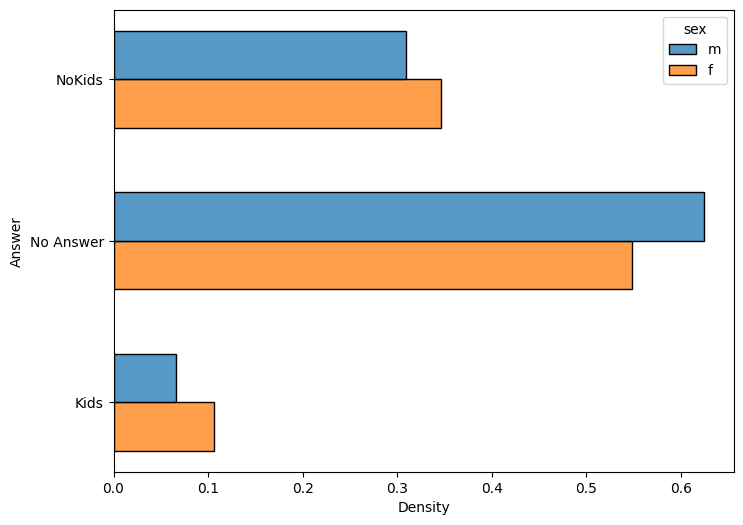

In [28]:
df.loc[df['offspring_cleaned'].str.contains('t have'), 'offspring_cleaned'] = 'NoKids'
df.loc[df['offspring_cleaned'].str.contains('has kids'), 'offspring_cleaned'] = 'Kids'
df.loc[df['offspring_cleaned'].str.contains('has a kid'), 'offspring_cleaned'] = 'Kids'
df.loc[df['offspring_cleaned'].str.contains('t want'), 'offspring_cleaned'] = 'NoKids'
df.loc[df['offspring_cleaned'].str.contains('wants'), 'offspring_cleaned'] = 'NoKids'

plt.figure(figsize=(8,6))
sns.histplot(data=df, y="offspring_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False)
plt.ylabel("Answer")
plt.show()

Most people didn't answer. Men were more likely not to answer.
Of the people that did answer, the majority did not have kids.

## Orientation

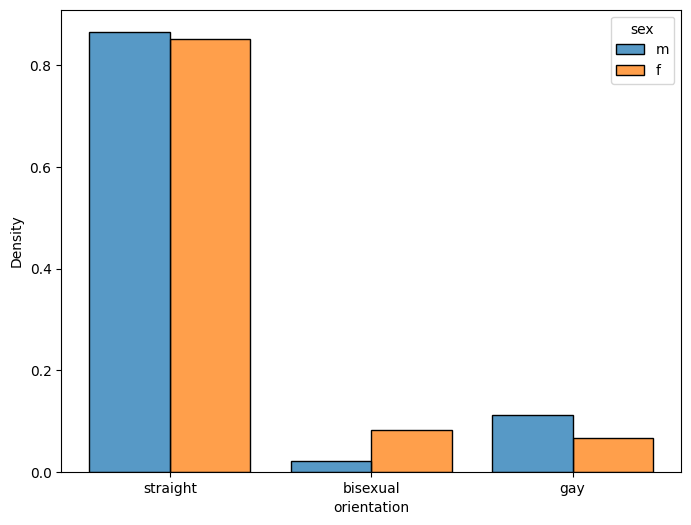

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="orientation", hue="sex", stat="density", multiple='dodge', shrink=0.8, common_norm=False)  
plt.show()

Most people identify as straight. Women slightly more likely to be bisexual, and slightly more men are gay. Given this heavy bias it is probably not a good choice to include in a prediction model.

## Pets Preference

In [30]:
# Clean the data first:
df['pets_cleaned'] = df['pets'].fillna("No Answer")

<Axes: xlabel='Density', ylabel='pets_cleaned'>

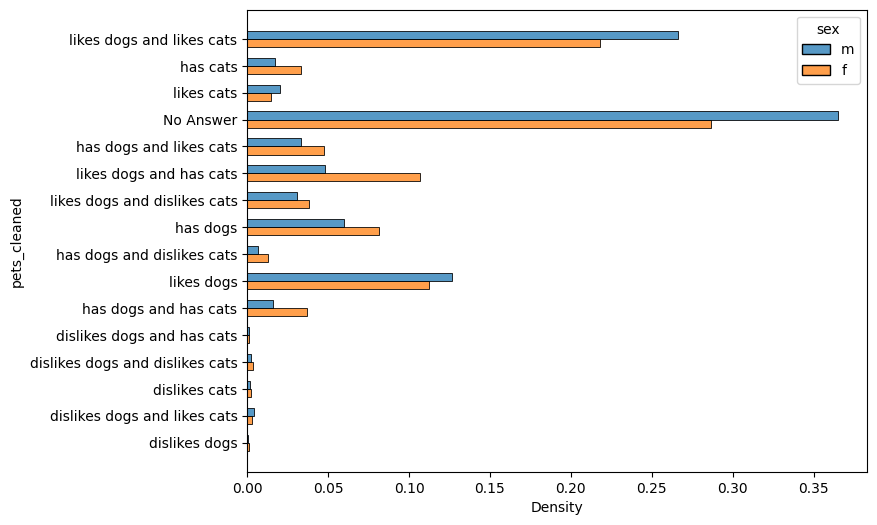

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, y="pets_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False)

Again, a large proportion of people didn't answer this quesstion.
* Most people like dogs or cats and look amiable to having the other type if they already have one.
* Few people have responded about disliking either animal.
* Of the owners, Women are more slightly more likely to have a pet than men.

## Religion
The options available in this section looks rather messy so needs a bit of aggregation for a cleaner picture.

In [32]:
# Clean the data first:
df['religion_cleaned'] = df['religion'].fillna("No Answer")

<Axes: xlabel='Density', ylabel='religion_cleaned'>

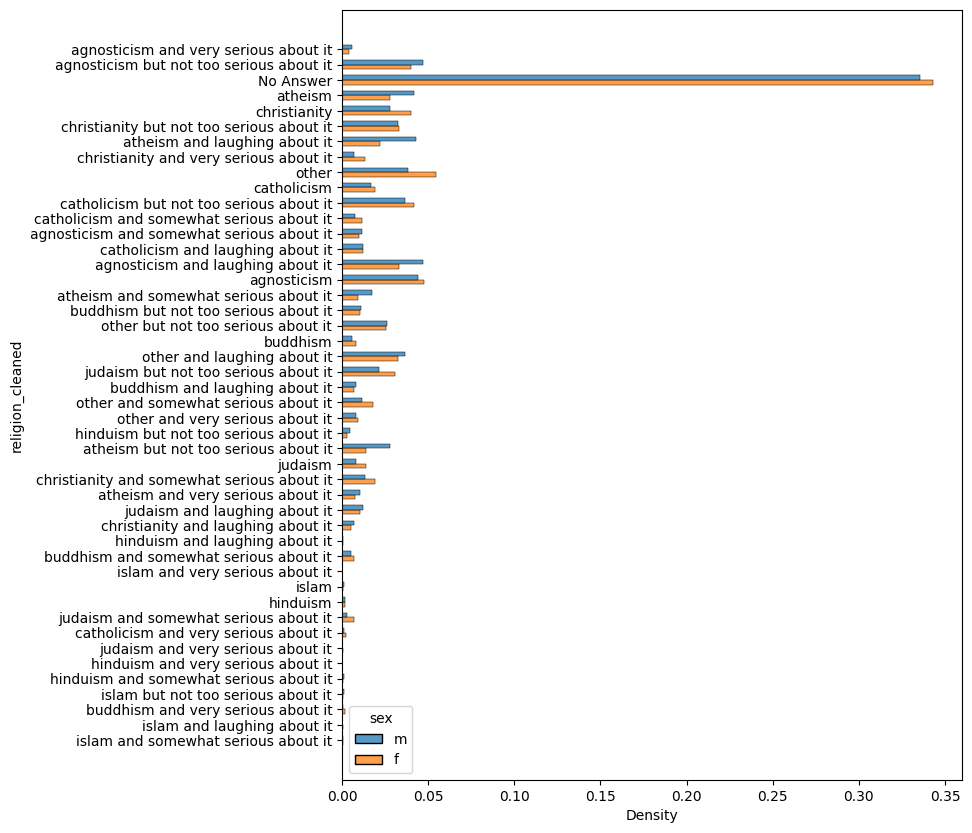

In [33]:
plt.figure(figsize=(8,10))
sns.histplot(data=df, y="religion_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False) 


In [34]:
# order by religion groups, no separation on how serious. Loads of no answer, NaN.
df['religion_cleaned'] = df['religion'].str.split().str[0]
# For simplicity, let's change all values of 'catholicism' to 'christianity'
df['religion_cleaned'] = df['religion_cleaned'].replace({'catholicism':'christianity'}, regex=True)

# change NaN to "no answer"
df['religion_cleaned'] = df['religion_cleaned'].fillna("No Answer")


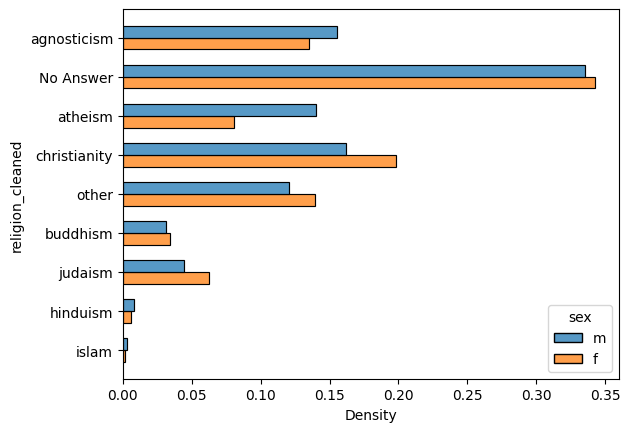

In [35]:
sns.histplot(data=df, y="religion_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False)
plt.show()

Discounting the "No Answer" category, it is fairly close split between Christianity, Agnosticism, Atheism and "other".
Women are more likely to be Christian than Men.

## Astral Sign

In [36]:
# Clean the data first:
df['sign_cleaned'] = df['sign'].fillna("No Answer")
print(df.sign_cleaned.value_counts())

sign_cleaned
No Answer                                        10899
gemini and it&rsquo;s fun to think about          1768
scorpio and it&rsquo;s fun to think about         1745
leo and it&rsquo;s fun to think about             1672
taurus and it&rsquo;s fun to think about          1627
libra and it&rsquo;s fun to think about           1626
cancer and it&rsquo;s fun to think about          1575
pisces and it&rsquo;s fun to think about          1574
sagittarius and it&rsquo;s fun to think about     1561
aries and it&rsquo;s fun to think about           1556
virgo and it&rsquo;s fun to think about           1553
aquarius and it&rsquo;s fun to think about        1490
virgo but it doesn&rsquo;t matter                 1487
leo but it doesn&rsquo;t matter                   1440
gemini but it doesn&rsquo;t matter                1434
cancer but it doesn&rsquo;t matter                1430
taurus but it doesn&rsquo;t matter                1427
aquarius but it doesn&rsquo;t matter              13

Most people treat this section lightly, with most answers not provided, of the ones that have provided the information, few are serious about it. We can aggregate and clean this data up to better view it.
No need to provide the "no answer" column here as it doesn't provide any useful insight.

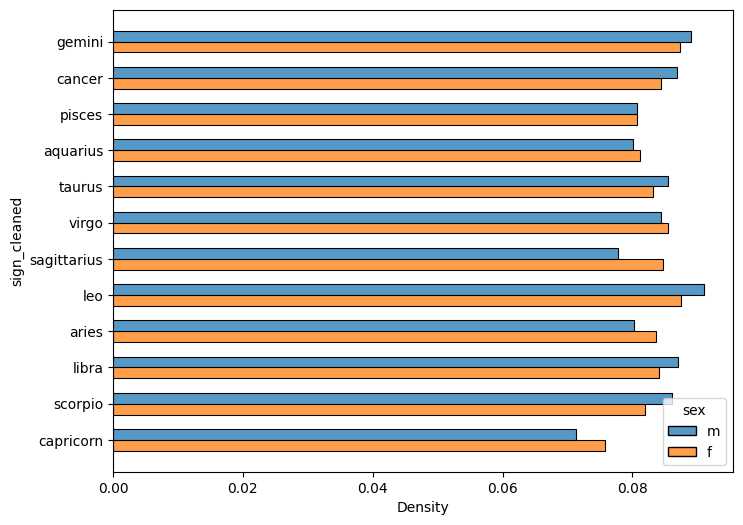

In [37]:
# aggregate this data
df['sign_cleaned'] = df['sign'].str.split().str[0]

plt.figure(figsize=(8,6))
sns.histplot(data=df, y="sign_cleaned", hue="sex", stat="density", multiple='dodge', shrink=0.6, common_norm=False) 
plt.show()

It's a pretty even spread in the data, with a little fewer for Capricorn. But this could be due to the sample size.

This data won't be very useful for predictions.

## Language Spoken
First up, let's clean out the skill levels in the brackets.


In [38]:
# No need to clean the NaN values as there was 0 when doing the intial exploration.
#temp = df[['speaks','sex']]
df['speaks'] = df.speaks.str.replace(r".\(.{4,9}\)", "", regex=True)
print(df.speaks.head())
#print(df.speaks.value_counts())

0                     english
1    english, spanish, french
2        english, french, c++
3             english, german
4                     english
Name: speaks, dtype: object


The data for language lists them all in the same column, which isn't ideal for analysing. 

We need to split them out to get a better picture of the data.

We can rearrange the data in 2 ways here; number of languages spoken, or can separate them into new columns prefixed with "language_" so as to get a better idea of the counts here.


In [39]:
# Create lists for languages spoken
df['languages_spoken'] = df['speaks'].str.split(', ')   # ensure the trailing space after the comma is caught!
# count the entries for number of languages spoken, regardless of stated ability (fluent, ok, poor)
df['languages_number'] = df['languages_spoken'].str.len().fillna(1) # we can safely assume that no answer here means they speak at least one language
df['languages_number'] = df['languages_number'].astype(int)   #.sum()
print(df['languages_number'].value_counts())

languages_number
1    28797
2    17038
3     8559
4     3190
5     1589
Name: count, dtype: int64


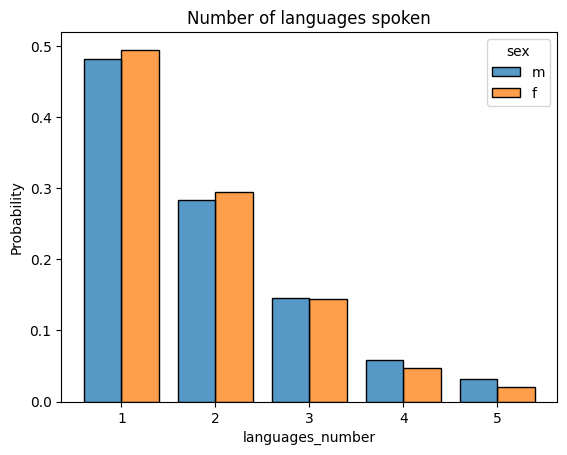

In [40]:
#plt.figure(figsize=(8,6))
sns.histplot(data=df, x="languages_number", discrete=True, hue="sex", stat="probability", multiple='dodge', shrink=0.8, common_norm=False) 
plt.title("Number of languages spoken")
#plt.xlabel("Number of languages spoken")
plt.show()

As an experiment, we'll see if there is any correlation between age and languages spoken.

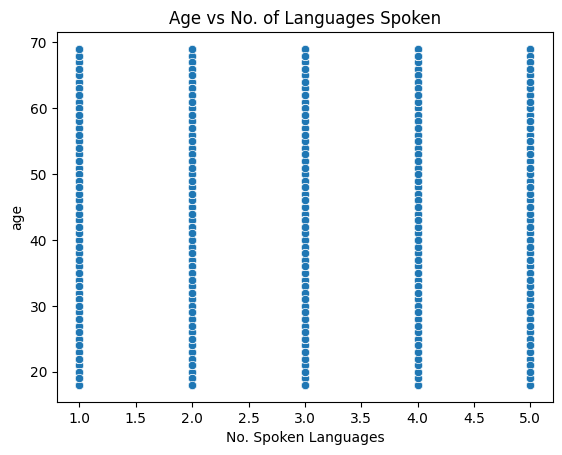

In [41]:
#sns.catplot(data=df, y='age', x='languages_number', kind='violin', hue='sex', split=True)
sns.scatterplot(data=df, x='languages_number', y='age')
plt.title("Age vs No. of Languages Spoken")
plt.xlabel("No. Spoken Languages")
plt.show()

Age doesn't appear to correlate with number of languages spoken.
Lets continue with separating it all out.

In [42]:
# speaks
# languages_spoken
df2 = pd.DataFrame(df['languages_spoken'])
df2['id'] = df2.index # create index to be used for matching data back to original dataframe
df['id'] = df.index # create index to be used for matching data back to original dataframe
df3 = df2.explode('languages_spoken')
df4 = pd.crosstab(df3['id'], df3['languages_spoken']).add_prefix('language_')
df4['id'] = df4.index   # create index to be used for matching data back to original dataframe

In [43]:
out = df.join(df4.set_index('id'), on='id', how='left')

That now gives a clearer picture of individual languages spoken in the dataset.

As expected for an English website, most people speak English. The next top languages spoken are Spanich, French and Chinese.


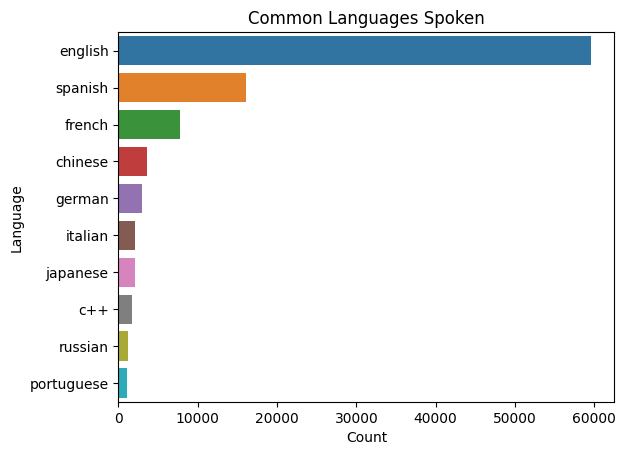

In [44]:
sns.countplot(data=df3, y='languages_spoken', order=df3.languages_spoken.value_counts().iloc[:10].index)
plt.title("Common Languages Spoken")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

## Location

In [45]:
locations = df.location.value_counts()
locations = locations.head(15)
print(locations)

location
san francisco, california    30632
oakland, california           7105
berkeley, california          4160
san mateo, california         1310
palo alto, california         1054
alameda, california            905
san rafael, california         753
hayward, california            740
emeryville, california         725
redwood city, california       685
daly city, california          674
san leandro, california        647
walnut creek, california       642
vallejo, california            556
menlo park, california         471
Name: count, dtype: int64


The top 15 counts in the profile are in California, with the majority in San Francisco.
This datapoint probably can't be used for predictions, due to the bias here.

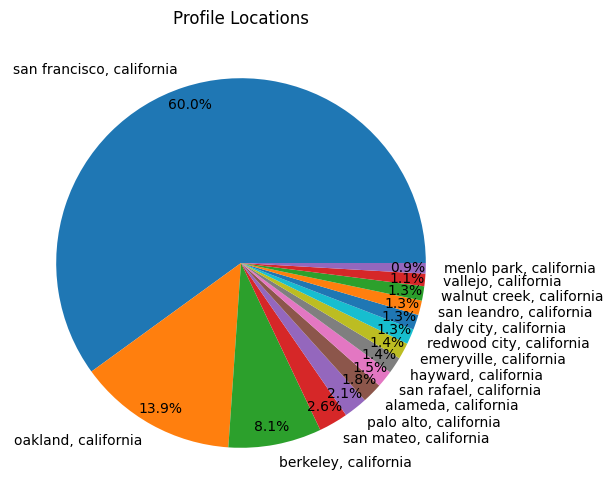

In [46]:
plt.figure(figsize=(10,6))
plt.pie(locations, labels=locations.keys(), autopct='%.1f%%', pctdistance=0.9)
plt.title("Profile Locations")
#plt.legend(locations.keys())
plt.show()

---
# Cleaning the Essay Data
{add stuff here}
We need to take a look at the essays, and see what the data is like there.


In [47]:
print(df.essay2.head())
print("---")
print(df.essay4.head())
print("---")
print(df.essay6.head())

0    making people laugh.<br />\nranting about a go...
1    being silly. having ridiculous amonts of fun w...
2    improvising in different contexts. alternating...
3    playing synthesizers and organizing books acco...
4    creating imagery to look at:<br />\nhttp://bag...
Name: essay2, dtype: object
---
0    books:<br />\nabsurdistan, the republic, of mi...
1    i am die hard christopher moore fan. i don't r...
2    okay this is where the cultural matrix gets so...
3    bataille, celine, beckett. . .<br />\nlynch, j...
4    music: bands, rappers, musicians<br />\nat the...
Name: essay4, dtype: object
---
0    duality and humorous things
1                            NaN
2                            NaN
3     cats and german philosophy
4                            NaN
Name: essay6, dtype: object


There is quite a bit of HTML code there, so those tags need to be removed. We can either use regex to find and replace this, or use the beautiful soup library which is a bit more comprehensive:

In [48]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    """Remove HTML tags from a string"""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#testframe = df['essay0'].apply(remove_html_tags)
print(remove_html_tags(df.essay2[0]))

making people laugh.
ranting about a good salting.
finding simplicity in complexity, and complexity in simplicity.


Lets apply this to the entire dataframe:

In [49]:
object_cols = [series for series in df if series.startswith('essay')]
for series in object_cols:
    df[series] = df[series].apply(lambda row: remove_html_tags(row) if pd.notnull(row) else row)


Print it out to ensure that it worked:

In [50]:
print(df.essay2[0])

making people laugh.
ranting about a good salting.
finding simplicity in complexity, and complexity in simplicity.


We need to convert categorical data into numerical data for ML algorithms. We would make use of mapping in the case where results 
aren't in numerical order.

# Question 1
Lets go through a demonstration of natural language processing with the question:

_Can we predict gender based on the language used in the essays?_

We need to use a classifier as we're using text and not numbers to get our predictions.
We can use naive bayes to classify male/female from given data.

first we need to combine the cleaned essays into one column to be able to do the next step.

In [45]:
df['essay_all'] = ' '
temp_data = df.loc[:, 'essay0':'essay9']
for essay in temp_data:
    df[essay] = df[essay].replace(np.nan, '')   # ensure there is no missing data
    df['essay_all'] = df[essay] + ' ' + df['essay_all']

print(df.essay_all.head())


0    you want to be swept off your feet!\nyou are t...
1     i am very open and will share just about anyt...
2    you are bright, open, intense, silly, ironic, ...
3    you feel so inclined.   cats and german philos...
4         music: bands, rappers, musicians\nat the ...
Name: essay_all, dtype: object


In [48]:
question_data = df[['essay_all', 'sex']]
#print(question_data.head())


                                           essay_all sex
0  you want to be swept off your feet!\nyou are t...   m
1   i am very open and will share just about anyt...   m
2  you are bright, open, intense, silly, ironic, ...   m
3  you feel so inclined.   cats and german philos...   m
4       music: bands, rappers, musicians\nat the ...   m


In [61]:
# import relevant libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [67]:
# this was a generic piece of code before being converted to a function to use in the k-fold validation
'''vectorizer = CountVectorizer()
X = vectorizer.fit_transform(question_data.essay_all)
X = X.tocsc()  # convert the format if an error appears
y = (question_data.sex == 'm').values.astype(np.int)
'''

def make_xy(essay_arr, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(essay_arr.essay_all)
    X = X.tocsc()  # convert the format if an error appears
    y = (essay_arr.sex == 'm').values.astype(np.int)
    return X, y
X, y = make_xy(question_data)

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print("Multinomial test Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest)))

Multinomial test Accuracy: 76.84%


In [70]:
train_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Test accuracy:     {test_accuracy*100:.2f}%")

Training accuracy: 84.12%
Test accuracy:     76.84%


We were able to predict the gender of the profile fairly accurately from the language used in the essays.

The confusion matrix for the prediction was as follows:

In [71]:
print(confusion_matrix(ytest, clf.predict(xtest)))

[[4578 1460]
 [1966 6790]]


We should see if we can improve things by implementing a K-fold cross validation. This divides the data into non-overlapping parts of size K. We then iterate over K- folds, and test against each one.

In [72]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

This next function calculates a likelihood score from the log-probability. The higher, the better the score.

In [73]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    female = y == 0
    male = ~female
    return prob[female, 0].sum() + prob[male, 1].sum()

In [74]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(question_data.shape[0]), train_size=0.7)
mask = np.zeros(question_data.shape[0], dtype=np.bool)
mask[itest] = True

In [75]:
#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(question_data, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [76]:
print(f'Best alpha value: {best_alpha:.2f}')
print(f'Minimum DF value: {best_min_df}')

Best alpha value: 50.00
Minimum DF value: 0.01


In [77]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(question_data, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

train_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)


print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Test accuracy:     {test_accuracy*100:.2f}%")

Training accuracy: 75.79%
Test accuracy:     74.04%


The training accuracy went down, and is now closer to the test accuracy which means there is reduced overfitting.

### Features
Let's take a look as to the features (words) chosen by the model that were used to predict the results.

In [94]:
words = np.array(vectorizer.get_feature_names_out()) # generate the list of predictive words

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

words_m = words[ind[:10]]
words_w = words[ind[-10:]]

prob_m = probs[ind[:10]]
prob_w = probs[ind[-10:]]

print("Words Men Used\t  P(word | word)")

# we need to convert the probability to the log format 
for word, prob in zip(words_m, prob_m):
    print(f"{word}\t\t {(1 - np.exp(prob)):.2f}")

#    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
print("Words Women Used\t  P(word | word)")
for word, prob in zip(words_w, prob_w):
    print(f"{word}\t\t {(1 - np.exp(prob)):.2f}")

Words Men Used	  P(word | word)
software		 0.84
computers		 0.83
beard		 0.81
engineering		 0.81
engineer		 0.80
fixing		 0.80
guy		 0.80
cars		 0.79
guitar		 0.79
video		 0.77
Words Women Used	  P(word | word)
curly		 0.38
adore		 0.37
jane		 0.36
fabulous		 0.35
chapstick		 0.35
anatomy		 0.34
prejudice		 0.33
gal		 0.33
baking		 0.32
heels		 0.29


The probability for men using the words is probably skewed by the dataset having more men than women.

We could test with some small essays of our own and see how it goes with the new data!

In [96]:
text = ["I'm a creative soul who loves to explore new things. I'm always up for an adventure, whether it's trying a new restaurant or traveling to a new city. I'm also a bit of a homebody and love spending time with my loved ones."]

vectorizer = CountVectorizer(min_df=best_min_df, vocabulary=vectorizer.get_feature_names_out())
x = vectorizer.fit_transform(text)
prob = clf.predict_proba(vectorizer.transform(text))
prob_m = prob[0, 1]
prob_w = prob[0, 0]
#man_prob = ('%.2f' % (100*prob_m))
#woman_prob = ('%.2f' % (100*prob_w))
# Prediction
print("Text/Essay: ", text)
print('')
if clf.predict(x) == 1:
    print(f"{prob_m*100:.2f} percent chance this is a man's essay")
else:
    print(f"{prob_w*100:.2f} percent chance this is a woman's essay")

Text/Essay:  ["I'm a creative soul who loves to explore new things. I'm always up for an adventure, whether it's trying a new restaurant or traveling to a new city. I'm also a bit of a homebody and love spending time with my loved ones."]

90.74 percent chance this is a woman's essay


In [97]:
text=["I'm a funny and outgoing person who loves to make people laugh. I'm also a bit of a romantic and believe in love at first sight. I'm looking for someone who is my equal in terms of humor and intelligence."]

vectorizer = CountVectorizer(min_df=best_min_df, vocabulary=vectorizer.get_feature_names_out())
x = vectorizer.fit_transform(text)
prob = clf.predict_proba(vectorizer.transform(text))
prob_m = prob[0, 1]
prob_w = prob[0, 0]
#man_prob = ('%.2f' % (100*prob_m))
#woman_prob = ('%.2f' % (100*prob_w))
# Prediction
print("Text/Essay: ", text)
print('')
if clf.predict(x) == 1:
    print(f"{prob_m*100:.2f} percent chance this is a man's essay")
else:
    print(f"{prob_w*100:.2f} percent chance this is a woman's essay")

Text/Essay:  ["I'm a funny and outgoing person who loves to make people laugh. I'm also a bit of a romantic and believe in love at first sight. I'm looking for someone who is my equal in terms of humor and intelligence."]

92.85 percent chance this is a woman's essay


In [98]:
text = ["I'm a down-to-earth person who is looking for someone to share my life with. I'm not looking for anything too serious, just someone to have fun with and enjoy life. I'm also a bit of a foodie and love to try new restaurants."]

vectorizer = CountVectorizer(min_df=best_min_df, vocabulary=vectorizer.get_feature_names_out())
x = vectorizer.fit_transform(text)
prob = clf.predict_proba(vectorizer.transform(text))
prob_m = prob[0, 1]
prob_w = prob[0, 0]
#man_prob = ('%.2f' % (100*prob_m))
#woman_prob = ('%.2f' % (100*prob_w))
# Prediction
print("Text/Essay: ", text)
print('')
if clf.predict(x) == 1:
    print(f"{prob_m*100:.2f} percent chance this is a man's essay")
else:
    print(f"{prob_w*100:.2f} percent chance this is a woman's essay")

Text/Essay:  ["I'm a down-to-earth person who is looking for someone to share my life with. I'm not looking for anything too serious, just someone to have fun with and enjoy life. I'm also a bit of a foodie and love to try new restaurants."]

82.36 percent chance this is a woman's essay


In [100]:
text = ["I love to travel, hike, and explore new places. I'm also a big fan of sports, and I enjoy playing basketball, soccer, and tennis. In my downtime, I like to read, watch movies, and spend time with my friends and family."]

vectorizer = CountVectorizer(min_df=best_min_df, vocabulary=vectorizer.get_feature_names_out())
x = vectorizer.fit_transform(text)
prob = clf.predict_proba(vectorizer.transform(text))
prob_m = prob[0, 1]
prob_w = prob[0, 0]
#man_prob = ('%.2f' % (100*prob_m))
#woman_prob = ('%.2f' % (100*prob_w))
# Prediction
print("Text/Essay: ", text)
print('')
if clf.predict(x) == 1:
    print(f"{prob_m*100:.2f} percent chance this is a man's essay")
else:
    print(f"{prob_w*100:.2f} percent chance this is a woman's essay")

Text/Essay:  ["I love to travel, hike, and explore new places. I'm also a big fan of sports, and I enjoy playing basketball, soccer, and tennis. In my downtime, I like to read, watch movies, and spend time with my friends and family."]

65.22 percent chance this is a man's essay


These sample texts were generated from google bard, so are quite ambiguous in their wording. It tended to produce bios that this data model predicted as being a Woman.

Perhaps this could be improved by using real data scraped from a dating website, or by using a training dataset that has a more even split of men vs women. 

---
# Converting data
Ordinal and categorical data should be converted to numerical data when working with regression and classification algorithms, so the first step is to map the data out, and convert it for use.

In [51]:
drink_mapping = {"No Answer": 0 , "not at all": 1, "rarely": 2, "socially": 3, "often": 4, "very often": 5, "desperately": 6}
df["drinks_code"] = df.drinks_cleaned.map(drink_mapping)
smoke_mapping = {"No Answer": 0, "no": 1, "sometimes": 2, "when drinking": 3, "yes": 4, "trying to quit": 5}
df["smokes_code"] = df.smokes_cleaned.map(smoke_mapping)
drug_mapping = {"No Answer": 0, "never": 1, "sometimes": 2, "often": 3}
df["drugs_code"] = df.drugs_cleaned.map(drug_mapping)
#education_mapping = {"No Answer":0, "DroppedOut":1, "Studying":2, "HighSchool":3, "TwoYearCollege":4, "SpaceCamp":5, "MedSchool":6, "Law":7, "College":8, "Masters":9, "PHD":10}
#df["education_code"] = df['education_cleaned'].map(education_mapping)
#body_type_codes = {"No Answer": 0, 'thin':1, 'skinny':2, 'fit':3, 'athletic':4, 'jacked':5, 'rather not say':6, 'average':7, 'a little extra':8, 'used up':9, 'curvy':10, 'overweight':11, 'full figured':12}
#df["body_type_code"] = df['body_type'].map(body_type_codes)


In [52]:
# get only selected items for data anaylsis, and remove any NaN values while we're at it
selected_features = ['job_cleaned', 'body_type_cleaned', 'education_cleaned', 'smokes_code', 'drinks_code' , 'drugs_code', 'sex', 'languages_number', 'income', 'pets_cleaned', 'religion_cleaned']
data = df[selected_features].dropna()
#data = data.dropna()

In [53]:
# Convert Categorical values into dummy indicator vars
dummy_list = ["pets_cleaned", "religion_cleaned", "sex", "body_type_cleaned", "education_cleaned"]
for item in dummy_list:
    data = pd.get_dummies(data, columns=[item], prefix=[item], drop_first=True)
#print(data.head(15))

In [54]:
print(data.shape)
print(data.head())

(59173, 52)
   job_cleaned  smokes_code  drinks_code  drugs_code  languages_number   
0   Government            2            3           1                 1  \
1  Hospitality            1            4           2                 3   
2    No Answer            1            3           0                 3   
3      Student            1            3           0                 2   
4         Arts            1            3           1                 1   

   income  pets_cleaned_dislikes cats  pets_cleaned_dislikes dogs   
0      -1                       False                       False  \
1   80000                       False                       False   
2      -1                       False                       False   
3   20000                       False                       False   
4      -1                       False                       False   

   pets_cleaned_dislikes dogs and dislikes cats   
0                                         False  \
1                         

In [55]:
print(data.dtypes)

job_cleaned                                     object
smokes_code                                      int64
drinks_code                                      int64
drugs_code                                       int64
languages_number                                 int32
income                                           int64
pets_cleaned_dislikes cats                        bool
pets_cleaned_dislikes dogs                        bool
pets_cleaned_dislikes dogs and dislikes cats      bool
pets_cleaned_dislikes dogs and has cats           bool
pets_cleaned_dislikes dogs and likes cats         bool
pets_cleaned_has cats                             bool
pets_cleaned_has dogs                             bool
pets_cleaned_has dogs and dislikes cats           bool
pets_cleaned_has dogs and has cats                bool
pets_cleaned_has dogs and likes cats              bool
pets_cleaned_likes cats                           bool
pets_cleaned_likes dogs                           bool
pets_clean

In [56]:
############### Split the data
features = data.iloc[:, 1:]
label = data['job_cleaned']

X_train, X_Test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

#scale and normalise the data
scaler = MinMaxScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_Test)


# Questions
1. Supervised:
   - predict body type based on lifestyle information?
   - predict religion based on lifestyle?
   - predict income based on job, education and lifestyle?
2. Unsupervised (k means clustering, neural network, PCA)

We will attempt to predict job based on:
- education
- income
- lifestyle
- languages spoken

We'll throw the entire dataset, minus the essays for unsupervised methods and see which components have the highest weightings.

# Split the data
First, we need to separate the data to training/test sets using the chosen input columns:

### Supervised Classification: Support Vector Machine (SVM)
Let's use an SVM to see how well this algorithm can classify and predict the type of jobs in the profile set.

In [122]:
##############
# Support Vector Machine
# this either takes a very long time, or isn't working! (~24 hours and still not completed!)
'''param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 10, 100],
              'kernel': ['poly', 'rbf']}'''
# using non linear kernels only for the dataset
#SVCmodel = SVC()
#svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 5)
#svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
#print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
#print("Best score is {}".format(svm_cv.best_score_))

In [57]:
#from sklearnex import patch_sklearn

params = {"C": 100.0, "kernel": "rbf", "gamma": "scale"}
#start = timer()
classifier = SVC(**params).fit(X_train, y_train)
#train_patched = timer() - start
#f"Intel® extension for Scikit-learn time: {train_patched:.2f} s"




NameError: name 'svm_cv' is not defined

In [ ]:
from sklearnex import patch_sklearn

params = {"C": 100.0, "kernel": "rbf", "gamma": "scale"}
#start = timer()
classifier = SVC(**params).fit(X_train, y_train)
#train_patched = timer() - start
#f"Intel® extension for Scikit-learn time: {train_patched:.2f} s"

In [61]:
from sklearn import metrics
predicted = classifier.predict(X_Test)
report = metrics.classification_report(y_test, predicted)

print(report)

                precision    recall  f1-score   support

         Admin       0.00      0.00      0.00       278
          Arts       0.00      0.00      0.00      2006
      Business       0.00      0.00      0.00      1352
Communications       0.00      0.00      0.00      1307
  Construction       0.00      0.00      0.00       290
     Education       0.00      0.00      0.00      1016
    Government       0.00      0.00      0.00       370
        Health       0.00      0.00      0.00      1090
   Hospitality       0.00      0.00      0.00       374
         Legal       0.00      0.00      0.00       419
     No Answer       0.16      0.96      0.28      2437
         Other       0.17      0.06      0.09      2568
          STEM       0.33      0.16      0.22      2784
       Student       0.27      0.16      0.20      1461

      accuracy                           0.18     17752
     macro avg       0.07      0.10      0.06     17752
  weighted avg       0.12      0.18      0.10 

# Predictions

In [62]:
##### Logistic Regression
logReg = LogisticRegression(multi_class="multinomial")
logReg.fit(X_train_Scaled, y_train)
logRegAcc = logReg.score(X_train_Scaled, y_train)
print("accuracy is: ", str(logRegAcc))

logReg_pred = logReg.predict(X_test_scaled)
logRegRes = classification_report(y_test, logReg_pred)
print("\nPredictions: ", str(logRegRes))

accuracy is:  0.3082011540040076

Predictions:                  precision    recall  f1-score   support

         Admin       0.00      0.00      0.00       278
          Arts       0.20      0.08      0.11      2006
      Business       0.19      0.05      0.08      1352
Communications       0.19      0.06      0.09      1307
  Construction       0.19      0.02      0.03       290
     Education       0.20      0.17      0.19      1016
    Government       0.00      0.00      0.00       370
        Health       0.50      0.13      0.21      1090
   Hospitality       0.00      0.00      0.00       374
         Legal       0.68      0.57      0.62       419
     No Answer       0.37      0.52      0.43      2437
         Other       0.22      0.29      0.25      2568
          STEM       0.31      0.63      0.42      2784
       Student       0.32      0.50      0.39      1461

      accuracy                           0.30     17752
     macro avg       0.24      0.22      0.20     1775

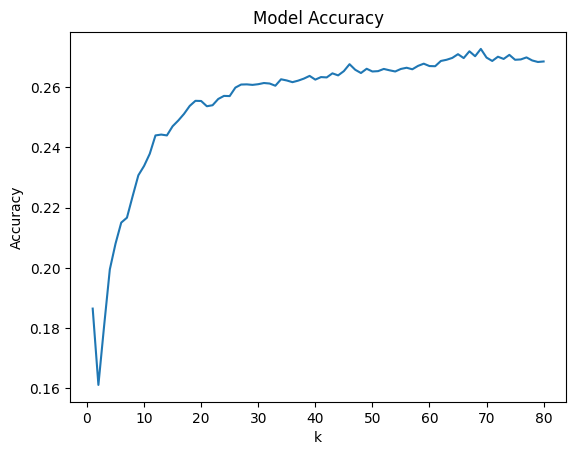

In [63]:
##### K Nearest Neighbour
# Find best K
KNN_results = []
kMax = 80
kList = list(range(1,kMax+1))

for k in range(1,kMax+1):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_Scaled, y_train)
    KNN_results.append(KNNmodel.score(X_test_scaled, y_test))
    
plt.plot(kList, KNN_results)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

In [64]:
# get best k automatically to feed into the next section!
bestK = np.array(KNN_results).argmax()
print(bestK)

68


In [65]:
KNNmodel = KNeighborsClassifier(n_neighbors = bestK)
KNNmodel.fit(X_train_Scaled, y_train)
knn_acc = KNNmodel.score(X_train_Scaled, y_train)

print("KNN accuracy is: {}%".format(round(knn_acc, 2) *100))
predictions = KNNmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))


KNN accuracy is: 30.0%
                precision    recall  f1-score   support

         Admin       0.00      0.00      0.00       278
          Arts       0.17      0.10      0.13      2006
      Business       0.17      0.09      0.12      1352
Communications       0.12      0.08      0.09      1307
  Construction       0.00      0.00      0.00       290
     Education       0.21      0.10      0.14      1016
    Government       0.00      0.00      0.00       370
        Health       0.36      0.06      0.10      1090
   Hospitality       0.00      0.00      0.00       374
         Legal       0.66      0.20      0.31       419
     No Answer       0.33      0.53      0.41      2437
         Other       0.21      0.23      0.22      2568
          STEM       0.30      0.61      0.40      2784
       Student       0.29      0.37      0.33      1461

      accuracy                           0.27     17752
     macro avg       0.20      0.17      0.16     17752
  weighted avg       0.

In [68]:
##### Decision Tree Classifier
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train_Scaled, y_train)
DT_acc = DT_model.score(X_train_Scaled, y_train)

print("DT accuracy on training data is: {}%".format(round(DT_acc, 2) *100))

DT_pred = DT_model.predict(X_test_scaled)
print(classification_report(y_test, DT_pred))

DT accuracy on training data is: 80.0%
                precision    recall  f1-score   support

         Admin       0.06      0.05      0.05       278
          Arts       0.14      0.16      0.15      2006
      Business       0.12      0.16      0.14      1352
Communications       0.10      0.11      0.10      1307
  Construction       0.06      0.06      0.06       290
     Education       0.12      0.12      0.12      1016
    Government       0.04      0.04      0.04       370
        Health       0.19      0.17      0.18      1090
   Hospitality       0.03      0.03      0.03       374
         Legal       0.44      0.40      0.42       419
     No Answer       0.34      0.36      0.35      2437
         Other       0.17      0.15      0.16      2568
          STEM       0.29      0.28      0.29      2784
       Student       0.27      0.23      0.25      1461

      accuracy                           0.20     17752
     macro avg       0.17      0.17      0.17     17752
  weigh

The predictions here on the training set seem to be a little too high, as can be seen on the performance with the test set. 
Lets put it in a grid search and see if any improvements can be made.

In [67]:
##############
#Decision Tree
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 5),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)
tree_cv.fit(X_train_Scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

# 31%, still pretty bad

### Tuned decision tree
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  8, min_samples_leaf = 2)
DTmodel.fit(X_train_Scaled, y_train)

training_accuracy = DTmodel.score(X_train_Scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}
Best score is 0.29277414897278187
The accuracy of model on training data is: 30.0%

                precision    recall  f1-score   support

         Admin       0.00      0.00      0.00       278
          Arts       0.18      0.01      0.01      2006
      Business       0.25      0.01      0.01      1352
Communications       0.09      0.00      0.00      1307
  Construction       0.18      0.01      0.01       290
     Education       0.18      0.22      0.20      1016
    Government       0.07      0.02      0.03       370
        Health       0.69      0.11      0.20      1090
   Hospitality       0.06      0.00      0.01       374
         Legal       0.67      0.56      0.61       419
     No Answer       0.51      0.35      0.41      2437
         Other       0.20      0.37      0.26      2568
          STEM       0.29      0.74      0.42      2784
       Student       0.34      0.50   

##############################
# Conclusion:
All the models are around 30% accuracy which is poor for a model. 

This means the data cannot be used to accurately predict body type. This would mostly 
be due to the fact that the originating data is how the user sees themselves, and is in no
way empirical data.

It is also a dataset that is somewhat influence by bias; most people were located within the San Francisco area, and are working in one of the most expensive areas in the world.